Heart Disease Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Heart (1).csv")

In [ ]:
df.head()

,c,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Heart (1).csv")

# Fill numeric missing values with mean
df = df.fillna(df.mean(numeric_only=True))

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Output cleaned dataset
print(df)


       c  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0      1   63    1       typical     145   233    1        2    150      0   
1      2   67    1  asymptomatic     160   286    0        2    108      1   
2      3   67    1  asymptomatic     120   229    0        2    129      1   
3      4   37    1    nonanginal     130   250    0        0    187      0   
4      5   41    0    nontypical     130   204    0        2    172      0   
..   ...  ...  ...           ...     ...   ...  ...      ...    ...    ...   
298  299   45    1       typical     110   264    0        0    132      0   
299  300   68    1  asymptomatic     144   193    1        0    141      0   
300  301   57    1  asymptomatic     130   131    0        0    115      1   
301  302   57    0    nontypical     130   236    0        2    174      0   
302  303   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope        Ca        Thal  AHD  
0        2.3  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for scaling
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Output normalized dataset
print(df_normalized.head())


          c       Age  Sex     ChestPain    RestBP      Chol  Fbs  RestECG  \
0  0.000000  0.708333  1.0       typical  0.481132  0.244292  1.0      1.0   
1  0.003311  0.791667  1.0  asymptomatic  0.622642  0.365297  0.0      1.0   
2  0.006623  0.791667  1.0  asymptomatic  0.245283  0.235160  0.0      1.0   
3  0.009934  0.166667  1.0    nonanginal  0.339623  0.283105  0.0      0.0   
4  0.013245  0.250000  0.0    nontypical  0.339623  0.178082  0.0      1.0   

      MaxHR  ExAng   Oldpeak  Slope        Ca        Thal  AHD  
0  0.603053    0.0  0.370968    1.0  0.000000       fixed   No  
1  0.282443    1.0  0.241935    0.5  1.000000      normal  Yes  
2  0.442748    1.0  0.419355    0.5  0.666667  reversable  Yes  
3  0.885496    0.0  0.564516    1.0  0.000000      normal   No  
4  0.770992    0.0  0.225806    0.0  0.000000      normal   No  


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Heart (1).csv")

# Fill missing values before scaling
df = df.fillna(df.mean(numeric_only=True))
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Standardization (Z-score)
std_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = std_scaler.fit_transform(df[numeric_cols])

# Output standardized dataset
print(df_standardized)


            c       Age       Sex     ChestPain    RestBP      Chol       Fbs  \
0   -1.726344  0.948726  0.686202       typical  0.757525 -0.264900  2.394438   
1   -1.714911  1.392002  0.686202  asymptomatic  1.611220  0.760415 -0.417635   
2   -1.703478  1.392002  0.686202  asymptomatic -0.665300 -0.342283 -0.417635   
3   -1.692046 -1.932564  0.686202    nonanginal -0.096170  0.063974 -0.417635   
4   -1.680613 -1.489288 -1.457296    nontypical -0.096170 -0.825922 -0.417635   
..        ...       ...       ...           ...       ...       ...       ...   
298  1.680613 -1.046013  0.686202       typical -1.234430  0.334813 -0.417635   
299  1.692046  1.502821  0.686202  asymptomatic  0.700612 -1.038723  2.394438   
300  1.703478  0.283813  0.686202  asymptomatic -0.096170 -2.238149 -0.417635   
301  1.714911  0.283813 -1.457296    nontypical -0.096170 -0.206864 -0.417635   
302  1.726344 -1.821745  0.686202    nonanginal  0.359134 -1.386944 -0.417635   

      RestECG     MaxHR    

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Heart (1).csv")

# Fill missing values before scaling
df = df.fillna(df.mean(numeric_only=True))
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Standardization (Z-score)
std_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = std_scaler.fit_transform(df[numeric_cols])

# Output standardized dataset
print(df_standardized)


            c       Age       Sex     ChestPain    RestBP      Chol       Fbs  \
0   -1.726344  0.948726  0.686202       typical  0.757525 -0.264900  2.394438   
1   -1.714911  1.392002  0.686202  asymptomatic  1.611220  0.760415 -0.417635   
2   -1.703478  1.392002  0.686202  asymptomatic -0.665300 -0.342283 -0.417635   
3   -1.692046 -1.932564  0.686202    nonanginal -0.096170  0.063974 -0.417635   
4   -1.680613 -1.489288 -1.457296    nontypical -0.096170 -0.825922 -0.417635   
..        ...       ...       ...           ...       ...       ...       ...   
298  1.680613 -1.046013  0.686202       typical -1.234430  0.334813 -0.417635   
299  1.692046  1.502821  0.686202  asymptomatic  0.700612 -1.038723  2.394438   
300  1.703478  0.283813  0.686202  asymptomatic -0.096170 -2.238149 -0.417635   
301  1.714911  0.283813 -1.457296    nontypical -0.096170 -0.206864 -0.417635   
302  1.726344 -1.821745  0.686202    nonanginal  0.359134 -1.386944 -0.417635   

      RestECG     MaxHR    

In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate statistics
mean_values = df[numeric_cols].mean()
median_values = df[numeric_cols].median()
mode_values = df[numeric_cols].mode().iloc[0]

# Output results
print("Mean:\n", mean_values, "\n")
print("Median:\n", median_values, "\n")
print("Mode:\n", mode_values, "\n")

Mean:
 c          152.000000
Age         54.438944
Sex          0.679868
RestBP     131.689769
Chol       246.693069
Fbs          0.148515
RestECG      0.990099
MaxHR      149.607261
ExAng        0.326733
Oldpeak      1.039604
Slope        1.600660
Ca           0.672241
dtype: float64 

Median:
 c          152.0
Age         56.0
Sex          1.0
RestBP     130.0
Chol       241.0
Fbs          0.0
RestECG      1.0
MaxHR      153.0
ExAng        0.0
Oldpeak      0.8
Slope        2.0
Ca           0.0
dtype: float64 

Mode:
 c            1.0
Age         58.0
Sex          1.0
RestBP     120.0
Chol       197.0
Fbs          0.0
RestECG      0.0
MaxHR      162.0
ExAng        0.0
Oldpeak      0.0
Slope        1.0
Ca           0.0
Name: 0, dtype: float64 



In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Heart (1).csv")

# Fill missing values
df = df.fillna(df.mean(numeric_only=True))
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate covariance & correlation
cov_matrix = df[numeric_cols].cov()
corr_matrix = df[numeric_cols].corr()

# Output results
print("Covariance Matrix:\n", cov_matrix, "\n")
print("Correlation Matrix:\n", corr_matrix)


Covariance Matrix:
                    c        Age       Sex      RestBP         Chol       Fbs  \
c        7676.000000  -1.874172 -2.900662  -33.966887  -433.301325 -1.231788   
Age        -1.874172  81.697419 -0.411995   45.328678    97.787489  0.381614   
Sex        -2.900662  -0.411995  0.218368   -0.530107    -4.836994  0.007967   
RestBP    -33.966887  45.328678 -0.530107  309.751120   118.573339  1.099207   
Chol     -433.301325  97.787489 -4.836994  118.573339  2680.849190  0.181496   
Fbs        -1.231788   0.381614  0.007967    1.099207     0.181496  0.126877   
RestECG   -13.096026   1.338797  0.010065    2.566455     8.811521  0.024654   
MaxHR    -211.413907 -81.423065 -0.520184  -18.258005    -4.064651 -0.063996   
ExAng      -0.016556   0.389220  0.032096    0.535473     1.491345  0.004295   
Oldpeak   -12.246026   2.138850  0.055436    3.865638     2.799282  0.002377   
Slope      -1.536424   0.901034  0.010808    1.273053    -0.129598  0.013147   
Ca          3.793307

Analysis of the Dataset

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


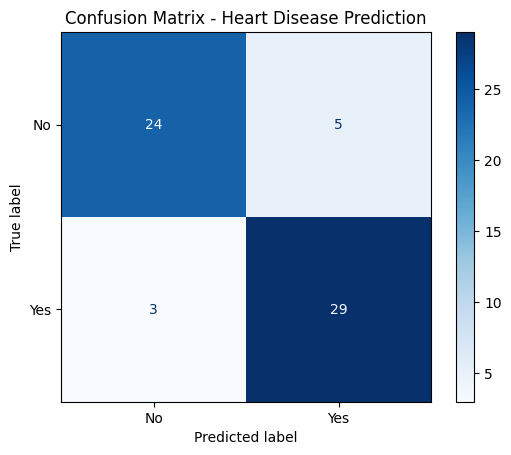

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Heart (1).csv")

# Fill missing values
df = df.fillna(df.mean(numeric_only=True))
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode target column AHD
df['AHD'] = df['AHD'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop(columns=['AHD', 'c']), drop_first=True)

# Features & Target
X = df_encoded
y = df['AHD']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

# Plot
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Heart Disease Prediction")
plt.show()


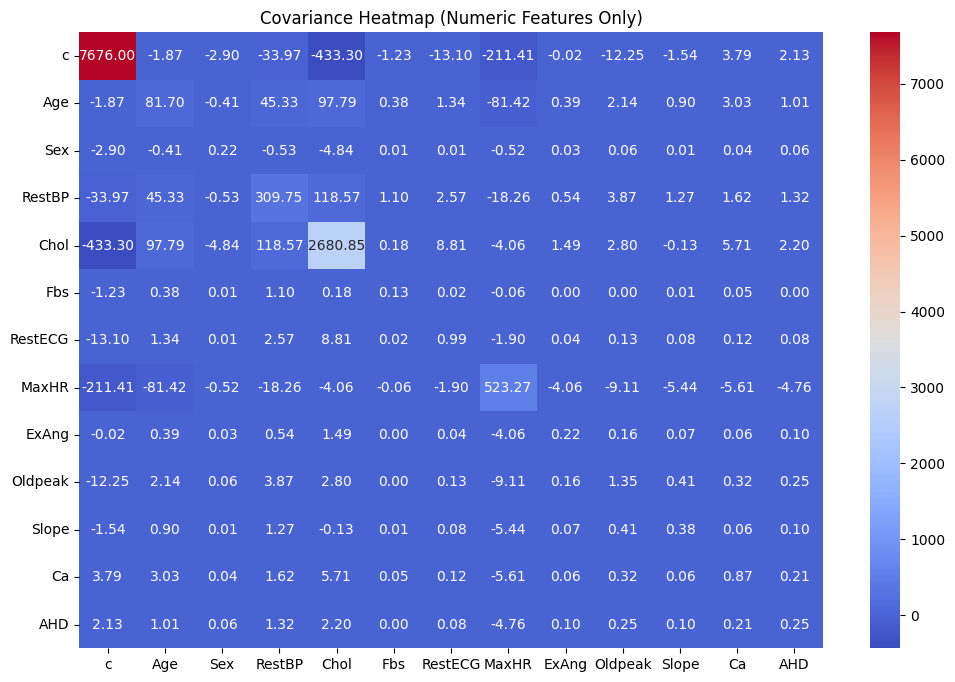

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Covariance heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.cov(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Covariance Heatmap (Numeric Features Only)")
plt.show()


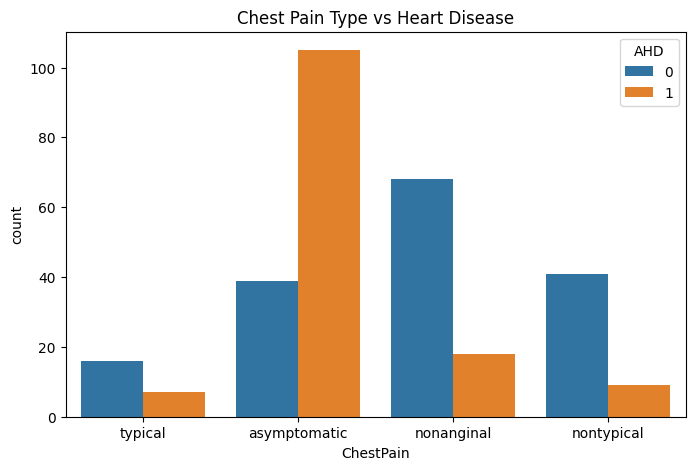

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot: ChestPain vs AHD
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="ChestPain", hue="AHD")
plt.title("Chest Pain Type vs Heart Disease")
plt.show()





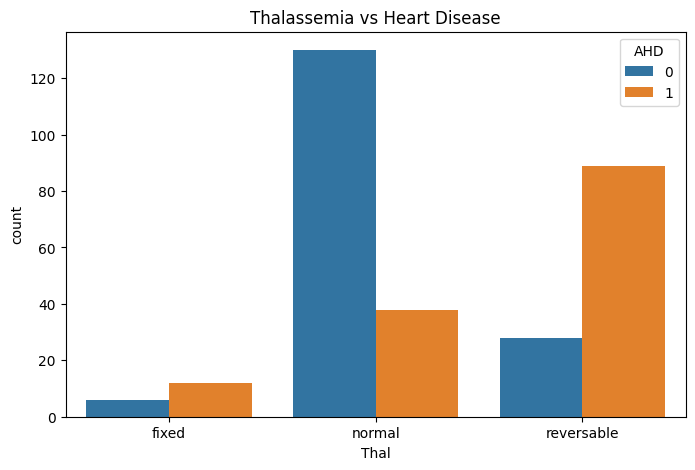

In [ ]:
# Bar plot: Thal vs AHD
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Thal", hue="AHD")
plt.title("Thalassemia vs Heart Disease")
plt.show()

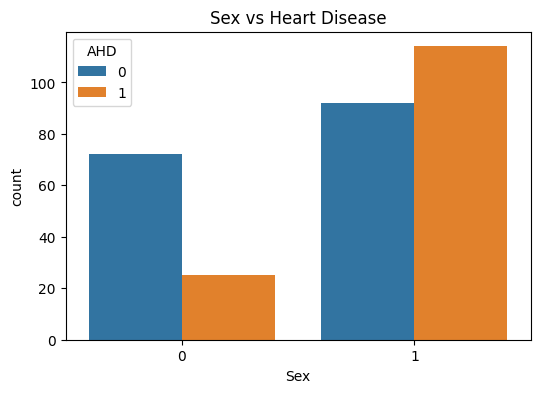

In [ ]:
# Bar plot: Sex vs AHD
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex", hue="AHD")
plt.title("Sex vs Heart Disease")
plt.show()

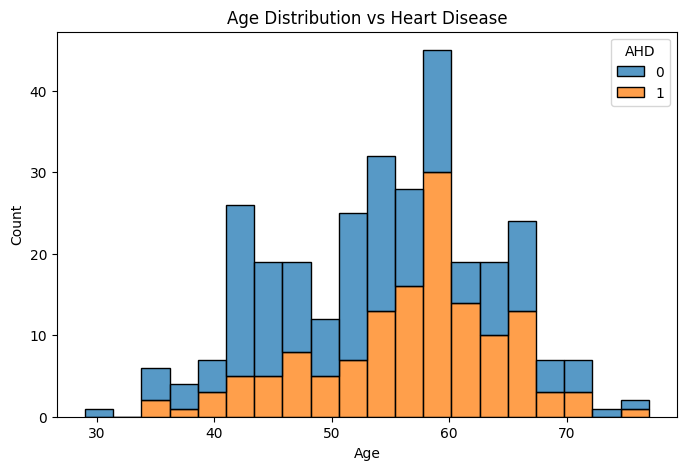

In [ ]:
# Example: Age distribution by AHD
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="AHD", multiple="stack", bins=20)
plt.title("Age Distribution vs Heart Disease")
plt.show()

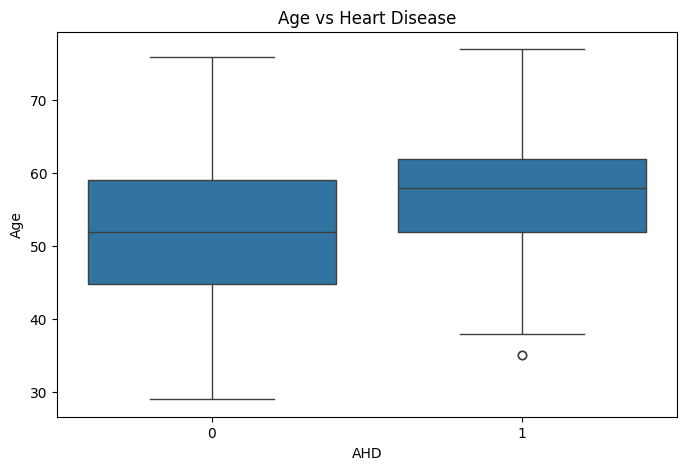

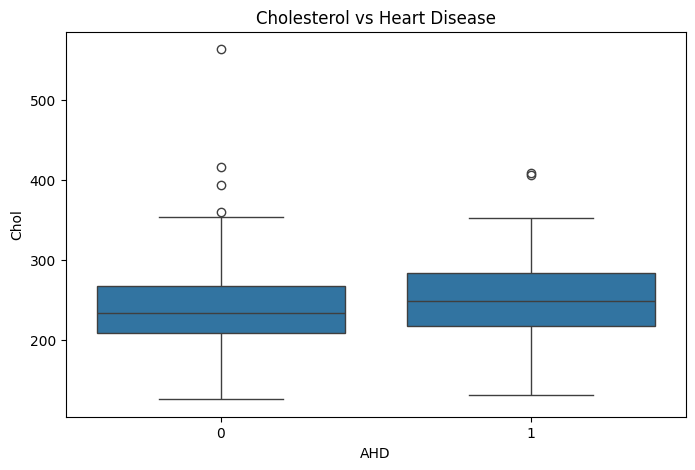

In [ ]:
# Boxplots (Feature vs Target)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="AHD", y="Age")
plt.title("Age vs Heart Disease")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="AHD", y="Chol")
plt.title("Cholesterol vs Heart Disease")
plt.show()